In [276]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from termcolor import colored
import requests
from bs4 import BeautifulSoup
from collections import Counter
pc = ['#FFB6C1', '#FFA07A', '#FFD700', '#98FB98', '#DDA0DD', '#87CEEB', '#F0E68C', '#FFE4E1', '#98FB98', '#FF69B4']


In [277]:
df = pd.read_csv('India_odi_bat.csv')

In [278]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13,Player
0,101*,195,121,10,0,83.47,3,not out,1,NaN,v South Africa,Eden Gardens,5 Nov 2023,ODI # 4694,Virat
1,88,139,94,11,0,93.61,3,caught,1,NaN,v Sri Lanka,Wankhede,2 Nov 2023,ODI # 4690,Virat
2,0,12,9,0,0,0.00,3,caught,1,NaN,v England,Lucknow,29 Oct 2023,ODI # 4686,Virat
3,95,154,104,8,2,91.34,3,caught,2,NaN,v New Zealand,Dharamsala,22 Oct 2023,ODI # 4678,Virat
4,103*,113,97,6,4,106.18,3,not out,2,NaN,v Bangladesh,Pune,19 Oct 2023,ODI # 4674,Virat


In [279]:
df.pop(df.columns[13])

0       ODI # 4694
1       ODI # 4690
2       ODI # 4686
3       ODI # 4678
4       ODI # 4674
           ...    
1603    ODI # 4651
1604    ODI # 4654
1605    ODI # 4666
1606    ODI # 4669
1607    ODI # 4674
Name: Unnamed: 13, Length: 1608, dtype: object

In [280]:
df.pop(df.columns[9])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1603   NaN
1604   NaN
1605   NaN
1606   NaN
1607   NaN
Name: Unnamed: 9, Length: 1608, dtype: float64

In [281]:
df.pop(df.columns[7])

0       not out
1        caught
2        caught
3        caught
4       not out
         ...   
1603          -
1604          -
1605          -
1606          -
1607          -
Name: Dismissal, Length: 1608, dtype: object

In [282]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Opposition,Ground,Start Date,Player
0,101*,195,121,10,0,83.47,3,1,v South Africa,Eden Gardens,5 Nov 2023,Virat
1,88,139,94,11,0,93.61,3,1,v Sri Lanka,Wankhede,2 Nov 2023,Virat
2,0,12,9,0,0,0.00,3,1,v England,Lucknow,29 Oct 2023,Virat
3,95,154,104,8,2,91.34,3,2,v New Zealand,Dharamsala,22 Oct 2023,Virat
4,103*,113,97,6,4,106.18,3,2,v Bangladesh,Pune,19 Oct 2023,Virat


In [283]:
df.shape

(1608, 12)

In [284]:
df = df[df['Runs'] != 'DNB']
df = df[df['Runs'] != 'TDNB']

In [285]:
df.shape

(1181, 12)

In [286]:
indian_stadiums = ['Eden Gardens', 'Wankhede', 'Lucknow', 'Dharamsala','Pune','Ahmedabad','Delhi','Chennai','Rajkot'\
'Visakhapatnam','Indore','Hyderabad','Thiruvananthapuram','Raipur','Guwahati','Bengaluru','Cuttack','Nagpur'\
                   ,'Ranchi','Mohali']
df['Ground'] = df['Ground'].apply(lambda x: 1 if x in indian_stadiums else 0)

In [287]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%d %b %Y')
df['Opposition'] = df['Opposition'].str[2:]

In [288]:
df['Mins'] = pd.to_numeric(df['Mins'], errors='coerce')
df['BF'] = pd.to_numeric(df['BF'], errors='coerce')
df['4s'] = pd.to_numeric(df['4s'], errors='coerce')
df['6s'] = pd.to_numeric(df['6s'], errors='coerce')
df['SR'] = pd.to_numeric(df['SR'], errors='coerce')
df['Pos'] = pd.to_numeric(df['Pos'], errors='coerce')
df['Inns'] = pd.to_numeric(df['Inns'], errors='coerce')
df['NO'] = df['Runs'].str.endswith('*').astype(int)
df['Runs'] = df['Runs'].str.replace('*', '')
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')

<ipython-input-288-c49f0468a10c>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Runs'] = df['Runs'].str.replace('*', '')


In [289]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Opposition,Ground,Start Date,Player,NO
0,101,195.0,121,10,0,83.47,3,1,South Africa,1,2023-11-05,Virat,1
1,88,139.0,94,11,0,93.61,3,1,Sri Lanka,1,2023-11-02,Virat,0
2,0,12.0,9,0,0,0.00,3,1,England,1,2023-10-29,Virat,0
3,95,154.0,104,8,2,91.34,3,2,New Zealand,1,2023-10-22,Virat,0
4,103,113.0,97,6,4,106.18,3,2,Bangladesh,1,2023-10-19,Virat,1


In [290]:
df.describe()

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Ground,NO
count,1181.000000,1028.000000,1181.000000,1181.000000,1181.000000,1164.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,33.180356,51.357004,35.664691,3.007621,0.705334,82.630086,4.807790,1.500423,0.340390,0.225233
std,37.932194,50.451920,35.282459,3.899471,1.447223,50.302241,2.785764,0.500212,0.474041,0.417913
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,5.000000,13.000000,8.000000,0.000000,0.000000,55.302500,3.000000,1.000000,0.000000,0.000000
50%,18.000000,32.000000,22.000000,2.000000,0.000000,81.750000,4.000000,2.000000,0.000000,0.000000
75%,51.000000,78.250000,55.000000,5.000000,1.000000,104.410000,7.000000,2.000000,1.000000,0.000000
max,264.000000,228.000000,173.000000,33.000000,16.000000,600.000000,11.000000,2.000000,1.000000,1.000000


In [291]:
df.describe()

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Ground,NO
count,1181.000000,1028.000000,1181.000000,1181.000000,1181.000000,1164.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,33.180356,51.357004,35.664691,3.007621,0.705334,82.630086,4.807790,1.500423,0.340390,0.225233
std,37.932194,50.451920,35.282459,3.899471,1.447223,50.302241,2.785764,0.500212,0.474041,0.417913
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,5.000000,13.000000,8.000000,0.000000,0.000000,55.302500,3.000000,1.000000,0.000000,0.000000
50%,18.000000,32.000000,22.000000,2.000000,0.000000,81.750000,4.000000,2.000000,0.000000,0.000000
75%,51.000000,78.250000,55.000000,5.000000,1.000000,104.410000,7.000000,2.000000,1.000000,0.000000
max,264.000000,228.000000,173.000000,33.000000,16.000000,600.000000,11.000000,2.000000,1.000000,1.000000


In [292]:
import numpy as np
conditions = [
    (df['Runs'] >= 100),
    (df['Runs'] >= 50)
]
values = [2, 1]
df['milestone'] = np.select(conditions, values, default=0)

In [293]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Opposition,Ground,Start Date,Player,NO,milestone
0,101,195.0,121,10,0,83.47,3,1,South Africa,1,2023-11-05,Virat,1,2
1,88,139.0,94,11,0,93.61,3,1,Sri Lanka,1,2023-11-02,Virat,0,1
2,0,12.0,9,0,0,0.00,3,1,England,1,2023-10-29,Virat,0,0
3,95,154.0,104,8,2,91.34,3,2,New Zealand,1,2023-10-22,Virat,0,1
4,103,113.0,97,6,4,106.18,3,2,Bangladesh,1,2023-10-19,Virat,1,2


Algorithm for batsman :
0.30*run_scored+0.05*notout_innigs+
0.20*bat_avg + 0.15*bat_sr+0.15*milestone_reaching_ability+ 0.10*no_of_4’s_6’s+0.05*high_score-0.05*no_of_zeroes
β_pos_score =max (α_batsmen_score_at_each_position)
4: γ_inningwise_score = 0.40*α_batsmen_score_first_inning+
0.60*α_batsmen_score_seocnd_inning
5: x_venue = 0.35*α_batsmen_score_home_matches+0.65*
α_batsmen_score_away_matches
6: y_opponent = 0.70*α_batsmen_score_strong_opponent+0.30*
α_batsmen_score_weak_opponent
7: w_yearwise = 0.20*α_batsmen_score_current_year+0.80*
α_batsmen_score_last_five_year
8:batting_score = 0.25*α_batsmen_score+0.10*β_pos_score+0.15*γ_inningwise_score+0.15*x_venue +0.15*
y_opponent+0.20*w_yearwise


In [294]:
def coun(data):
  if data.shape[0] == 0:
    return 0
  else :
    n= 1/data.shape[0]
  ans = (data['Runs'].sum()*0.3) + (0.05*data[data['NO'] == 1].shape[0]) +(0.20*data['Runs'].mean())\
  +(data['SR'].mean()*0.15) + (15*(data[data['milestone'] == 1].shape[0]+data[data['milestone'] == 2].shape[0])*n) +\
  (0.10 * (data['4s'].sum()+data['6s'].sum())) + (0.05 * data['Runs'].max()) - (0.05 * data[data['Runs'] == 0].shape[0])
  return ans

In [295]:
from datetime import datetime
def count(data,date):
  year =  datetime.strptime(date, "%d %b %Y").year
  data = data[data['Start Date']<=datetime.strptime(date, "%d %b %Y")]
  alpha_batsmen_score = coun(data)
  unp = data['Pos'].unique()
  beta_batsmen_score = 0
  for i in range(len(unp)):
    ans = coun(data[data['Pos'] == unp[i]])
    beta_batsmen_score = max (beta_batsmen_score,ans)
  gemma_batsmen_score = (0.40*coun(data[data['Inns'] == 1])) + (0.60*coun(data[data['Inns'] == 2]))
  x_venue = (0.35*coun(data[data['Ground'] == 1])) + (0.65*coun(data[data['Ground'] == 0]))
  y_opponent = (0.70*coun(data[data['Opposition'] == 'South Africa'])) + (0.30*coun(data[data['Opposition'] == 'Pakistan']))
  w_yearwise =(0.80*coun(data[(data['Start Date'].dt.year >= (year-5)) & (data['Start Date'].dt.year <= year)])) \
  + (0.20*coun(data[data['Start Date'] == year]))
  batting_score = (0.25*alpha_batsmen_score) + (0.10*beta_batsmen_score) +\
  (0.15*gemma_batsmen_score) + (0.15*x_venue) + (0.15*y_opponent) + (0.20*w_yearwise)
  return batting_score

In [296]:
ans = df[df['Player']=='Virat']
count(ans,"05 Nov 2023")

2412.511700280279

In [297]:
df2 = pd.read_csv('India_odi_bow.csv')

In [298]:
df2.head()

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Unnamed: 7,Opposition,Ground,Start Date,Unnamed: 11,Player
0,DNB,-,-,-,-,-,2,NaN,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742,Virat
1,DNB,-,-,-,-,-,1,NaN,v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745,Virat
2,DNB,-,-,-,-,-,2,NaN,v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750,Virat
3,DNB,-,-,-,-,-,2,NaN,v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755,Virat
4,DNB,-,-,-,-,-,1,NaN,v Sri Lanka,Colombo (RPS),29 Aug 2008,ODI # 2756,Virat


In [299]:
df2.pop(df2.columns[11])

0       ODI # 2742
1       ODI # 2745
2       ODI # 2750
3       ODI # 2755
4       ODI # 2756
           ...    
1603    ODI # 4651
1604    ODI # 4654
1605    ODI # 4666
1606    ODI # 4669
1607    ODI # 4674
Name: Unnamed: 11, Length: 1608, dtype: object

In [300]:
df2.pop(df2.columns[7])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1603   NaN
1604   NaN
1605   NaN
1606   NaN
1607   NaN
Name: Unnamed: 7, Length: 1608, dtype: float64

In [301]:
df2 = df2[df2['Overs'] != 'DNB']
df2 = df2[df2['Overs'] != 'TDNB']

In [302]:
df2['Overs'] = pd.to_numeric(df2['Overs'], errors='coerce')
df2['Mdns'] = pd.to_numeric(df2['Mdns'], errors='coerce')
df2['Runs'] = pd.to_numeric(df2['Runs'], errors='coerce')
df2['Wkts'] = pd.to_numeric(df2['Wkts'], errors='coerce')
df2['Econ'] = pd.to_numeric(df2['Econ'], errors='coerce')
df2['Pos'] = pd.to_numeric(df2['Pos'], errors='coerce')
df2['Inns'] = pd.to_numeric(df2['Inns'], errors='coerce')
df2['Start Date'] = pd.to_datetime(df2['Start Date'], format='%d %b %Y')

In [303]:
df2.describe()

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,7.675195,0.340378,39.161290,1.314794,5.247920,3.875417,1.417130
std,2.785785,0.631261,17.643071,1.235118,1.923812,1.630051,0.493359
min,0.100000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,6.000000,0.000000,27.000000,0.000000,4.000000,3.000000,1.000000
50%,9.000000,0.000000,39.000000,1.000000,5.000000,4.000000,1.000000
75%,10.000000,1.000000,51.000000,2.000000,6.200000,5.000000,2.000000
max,10.000000,4.000000,87.000000,6.000000,18.000000,9.000000,2.000000


In [304]:
df2.isnull().sum()

Overs         0
Mdns          0
Runs          0
Wkts          0
Econ          0
Pos           0
Inns          0
Opposition    0
Ground        0
Start Date    0
Player        0
dtype: int64

In [305]:
indian_stadiums = ['Eden Gardens', 'Wankhede', 'Lucknow', 'Dharamsala','Pune','Ahmedabad','Delhi','Chennai','Rajkot'\
'Visakhapatnam','Indore','Hyderabad','Thiruvananthapuram','Raipur','Guwahati','Bengaluru','Cuttack','Nagpur'\
                   ,'Ranchi','Mohali']
df2['Ground'] = df2['Ground'].apply(lambda x: 1 if x in indian_stadiums else 0)
df2['Opposition'] = df2['Opposition'].str[2:]

In [306]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 6 to 1607
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Overs       899 non-null    float64       
 1   Mdns        899 non-null    int64         
 2   Runs        899 non-null    int64         
 3   Wkts        899 non-null    int64         
 4   Econ        899 non-null    float64       
 5   Pos         899 non-null    int64         
 6   Inns        899 non-null    int64         
 7   Opposition  899 non-null    object        
 8   Ground      899 non-null    int64         
 9   Start Date  899 non-null    datetime64[ns]
 10  Player      899 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 84.3+ KB


In [307]:
def bowscore(data):
  if data.shape[0] == 0 :
    return 0;
  cw = 1
  if data['Wkts'].sum() != 0 :
    cw = 1/data['Wkts'].sum()
  else :
    cw = 0
  ans = (data['Wkts'].sum()*0.3) + (0.20*data['Runs'].sum()*cw) + \
  (0.10*((((data['Overs'] * 10) % 10).astype(int))+ (data['Overs'].astype(int) * 6)).sum()) + \
  (0.15*data['Runs'].sum()/data['Overs'].sum()) + (0.10*(data[data['Wkts']==4].shape[0]+data[data['Wkts']==5].shape[0])) +\
  (0.05*data['Wkts'].max() + (0.10*data['Mdns'].sum()) )
  return ans

In [308]:
def count2(data,date):
  year =  datetime.strptime(date, "%d %b %Y").year
  data = data[data['Start Date']<=datetime.strptime(date, "%d %b %Y")]
  if data.shape[0] == 0:
    return 0
  alpha_bow_score = bowscore(data)
  beta_bow_score = (0.40*bowscore(data[data['Inns'] == 1])) + (0.60*bowscore(data[data['Inns'] == 2]))
  x_venue = (0.40*bowscore(data[data['Ground'] == 1])) + (0.60*bowscore(data[data['Ground'] == 0]))
  y_opponent = (0.80*bowscore(data[data['Opposition'] == 'South Africa'])) + (0.20*bowscore(data[data['Opposition'] == 'Pakistan']))
  w_yearwise =(0.80*bowscore(data[(data['Start Date'].dt.year >= (year-5)) & (data['Start Date'].dt.year <= year)]))
  + (0.20*bowscore(data[data['Start Date'] == year]))
  bow_score = (0.30*alpha_bow_score) + (0.20*beta_bow_score) +\
  + (0.15*0) + (0.20*0) + (0.15*0)
  return bow_score

In [309]:
count2(df2[df2['Player']=='Ashwin'],"20 Nov 2023")

273.13007034491045

In [310]:
def batall(name,date):
  batal = (count2(df2[df2['Player']==name],date)*0.30) + (0.50*count(df[df['Player']==name],date)) + (0.20*(count(df[df['Player']==name],date)\
                                                                                                            -count2(df2[df2['Player']==name],date)))
  return batal

In [311]:
def bowall(name,date):
  bowal = (count2(df2[df2['Player']==name],date)*0.45) + (0.35*count(df[df['Player']==name],date)) + (0.20*(count(df[df['Player']==name],date)-\
                                                                                                            count2(df2[df2['Player']==name],date)))
  return bowal

In [312]:
df3 = pd.read_csv('India_odi_f.csv')

In [313]:
df3.head()

,Dis,Ct,St,Ct Wk,Ct Fi,Inns,Unnamed: 6,Opposition,Ground,Start Date,Unnamed: 10,Player
0,0,0,0,0,0,2,NaN,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742,Virat
1,3,3,0,0,3,1,NaN,v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745,Virat
2,0,0,0,0,0,2,NaN,v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750,Virat
3,0,0,0,0,0,2,NaN,v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755,Virat
4,0,0,0,0,0,1,NaN,v Sri Lanka,Colombo (RPS),29 Aug 2008,ODI # 2756,Virat


In [314]:
df3.pop(df3.columns[10])

0       ODI # 2742
1       ODI # 2745
2       ODI # 2750
3       ODI # 2755
4       ODI # 2756
           ...    
1603    ODI # 4651
1604    ODI # 4654
1605    ODI # 4666
1606    ODI # 4669
1607    ODI # 4674
Name: Unnamed: 10, Length: 1608, dtype: object

In [315]:
df3.pop(df3.columns[6])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1603   NaN
1604   NaN
1605   NaN
1606   NaN
1607   NaN
Name: Unnamed: 6, Length: 1608, dtype: float64

In [316]:
df3.pop(df3.columns[1])

0       0
1       3
2       0
3       0
4       0
       ..
1603    0
1604    0
1605    1
1606    0
1607    0
Name: Ct, Length: 1608, dtype: object

In [317]:
df3.pop(df3.columns[0])

0       0
1       3
2       0
3       0
4       0
       ..
1603    0
1604    0
1605    1
1606    0
1607    0
Name: Dis, Length: 1608, dtype: object

In [318]:
df3.describe()

,St,Ct Wk,Ct Fi,Inns,Opposition,Ground,Start Date,Player
count,1608,1608,1608,1608,1608,1608,1608,1608
unique,3,5,5,3,15,73,373,17
top,0,0,0,1,v Australia,Colombo (RPS),14 Oct 2023,Virat
freq,1577,1553,1117,899,291,81,11,289


In [319]:
indian_stadiums = ['Eden Gardens', 'Wankhede', 'Lucknow', 'Dharamsala','Pune','Ahmedabad','Delhi','Chennai','Rajkot'\
'Visakhapatnam','Indore','Hyderabad','Thiruvananthapuram','Raipur','Guwahati','Bengaluru','Cuttack','Nagpur'\
                   ,'Ranchi','Mohali']
df3['Ground'] = df3['Ground'].apply(lambda x: 1 if x in indian_stadiums else 0)

In [320]:
df3.head()

,St,Ct Wk,Ct Fi,Inns,Opposition,Ground,Start Date,Player
0,0,0,0,2,v Sri Lanka,0,18 Aug 2008,Virat
1,0,0,3,1,v Sri Lanka,0,20 Aug 2008,Virat
2,0,0,0,2,v Sri Lanka,0,24 Aug 2008,Virat
3,0,0,0,2,v Sri Lanka,0,27 Aug 2008,Virat
4,0,0,0,1,v Sri Lanka,0,29 Aug 2008,Virat


In [321]:
df3['Start Date'] = pd.to_datetime(df3['Start Date'], format='%d %b %Y')

In [322]:
df3['St'] = pd.to_numeric(df3['St'], errors='coerce')
df3['Ct Wk'] = pd.to_numeric(df3['Ct Wk'], errors='coerce')
df3['Ct Fi'] = pd.to_numeric(df3['Ct Fi'], errors='coerce')

In [323]:
df3.isnull().sum()

St            24
Ct Wk         24
Ct Fi         24
Inns           0
Opposition     0
Ground         0
Start Date     0
Player         0
dtype: int64

In [324]:
df3.dropna(subset=['St'], inplace=True)

In [325]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(df3['Opposition']))
df3['Opposition'] = df3['Opposition'].apply(lambda x: le.transform([x])[0])

In [326]:
def wek(data,name,date):
  data = data[data['Start Date']<=datetime.strptime(date, "%d %b %Y")]
  if data.shape[0] == 0:
    return 0
  beta_wicket_keeping_ability = 0.70*data['Ct Wk'].sum() + 0.30*data['St'].sum()
  wicket_keeper_score = 0.45 * count(df[df['Player']==name],date) + 0.55*beta_wicket_keeping_ability
  return wicket_keeper_score

In [327]:
print(wek(df3[df3['Player']=='Rohit'],'Rohit',"20 Nov 2023"))

831.3762117530794


In [345]:
df4 =  pd.read_csv('Matches.csv')

In [346]:
df4.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Selection Status,Roll,Match Date
0,Virat,NaN,NaN,NaN,NaN,NaN,Australia,1,Batsman,12 Jan 2016
1,Rohit,NaN,NaN,NaN,NaN,NaN,Australia,1,Batsman,12 Jan 2016
2,Ishan,NaN,NaN,NaN,NaN,NaN,Australia,0,Batsman,12 Jan 2016
3,Sheryas,NaN,NaN,NaN,NaN,NaN,Australia,0,Batsman,12 Jan 2016
4,Rahul,NaN,NaN,NaN,NaN,NaN,Australia,0,Batsman,12 Jan 2016


In [347]:
for index, row in df4.iterrows():
    name = df4.at[index,'Name']
    date = df4.at[index,'Match Date']
    df4.at[index,'bat_score'] = round(count(df[df['Player']==name],date),2)
    df4.at[index,'bow_score'] = round(count2(df2[df2['Player']==name],date),2)
    df4.at[index,'all_bat'] = round(batall(name,date),2)
    df4.at[index,'all_bow'] = round(bowall(name,date),2)
    df4.at[index,'wkt'] = round(wek(df3[df3['Player']==name],name,date),2)

In [348]:
df4.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Selection Status,Roll,Match Date
0,Virat,1367.06,41.73,961.12,762.32,615.18,Australia,1,Batsman,12 Jan 2016
1,Rohit,907.20,31.59,638.20,506.86,408.24,Australia,1,Batsman,12 Jan 2016
2,Ishan,0.00,0.00,0.00,0.00,0.00,Australia,0,Batsman,12 Jan 2016
3,Sheryas,0.00,0.00,0.00,0.00,0.00,Australia,0,Batsman,12 Jan 2016
4,Rahul,0.00,0.00,0.00,0.00,0.00,Australia,0,Batsman,12 Jan 2016


In [349]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(df4['Roll']))
df4['Roll'] = df4['Roll'].apply(lambda x: le.transform([x])[0])
df4['Roll'].unique()

array([1, 0, 2, 3])

In [350]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(df4['Opposition ']))
df4['Opposition '] = df4['Opposition '].apply(lambda x: le.transform([x])[0])

In [351]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(df4['Name']))
df4['Name'] = df4['Name'].apply(lambda x: le.transform([x])[0])

In [352]:
df4['Opposition']=df4['Opposition ']

In [353]:
df4 = df4.drop(['Opposition '],axis=1)
df4 = df4.drop(['Match Date'],axis=1)

In [354]:
df4.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Selection Status,Roll,Opposition
0,16,1367.06,41.73,961.12,762.32,615.18,1,1,1
1,9,907.20,31.59,638.20,506.86,408.24,1,1,1
2,3,0.00,0.00,0.00,0.00,0.00,0,1,1
3,12,0.00,0.00,0.00,0.00,0.00,0,1,1
4,8,0.00,0.00,0.00,0.00,0.00,0,1,1


<Axes: >

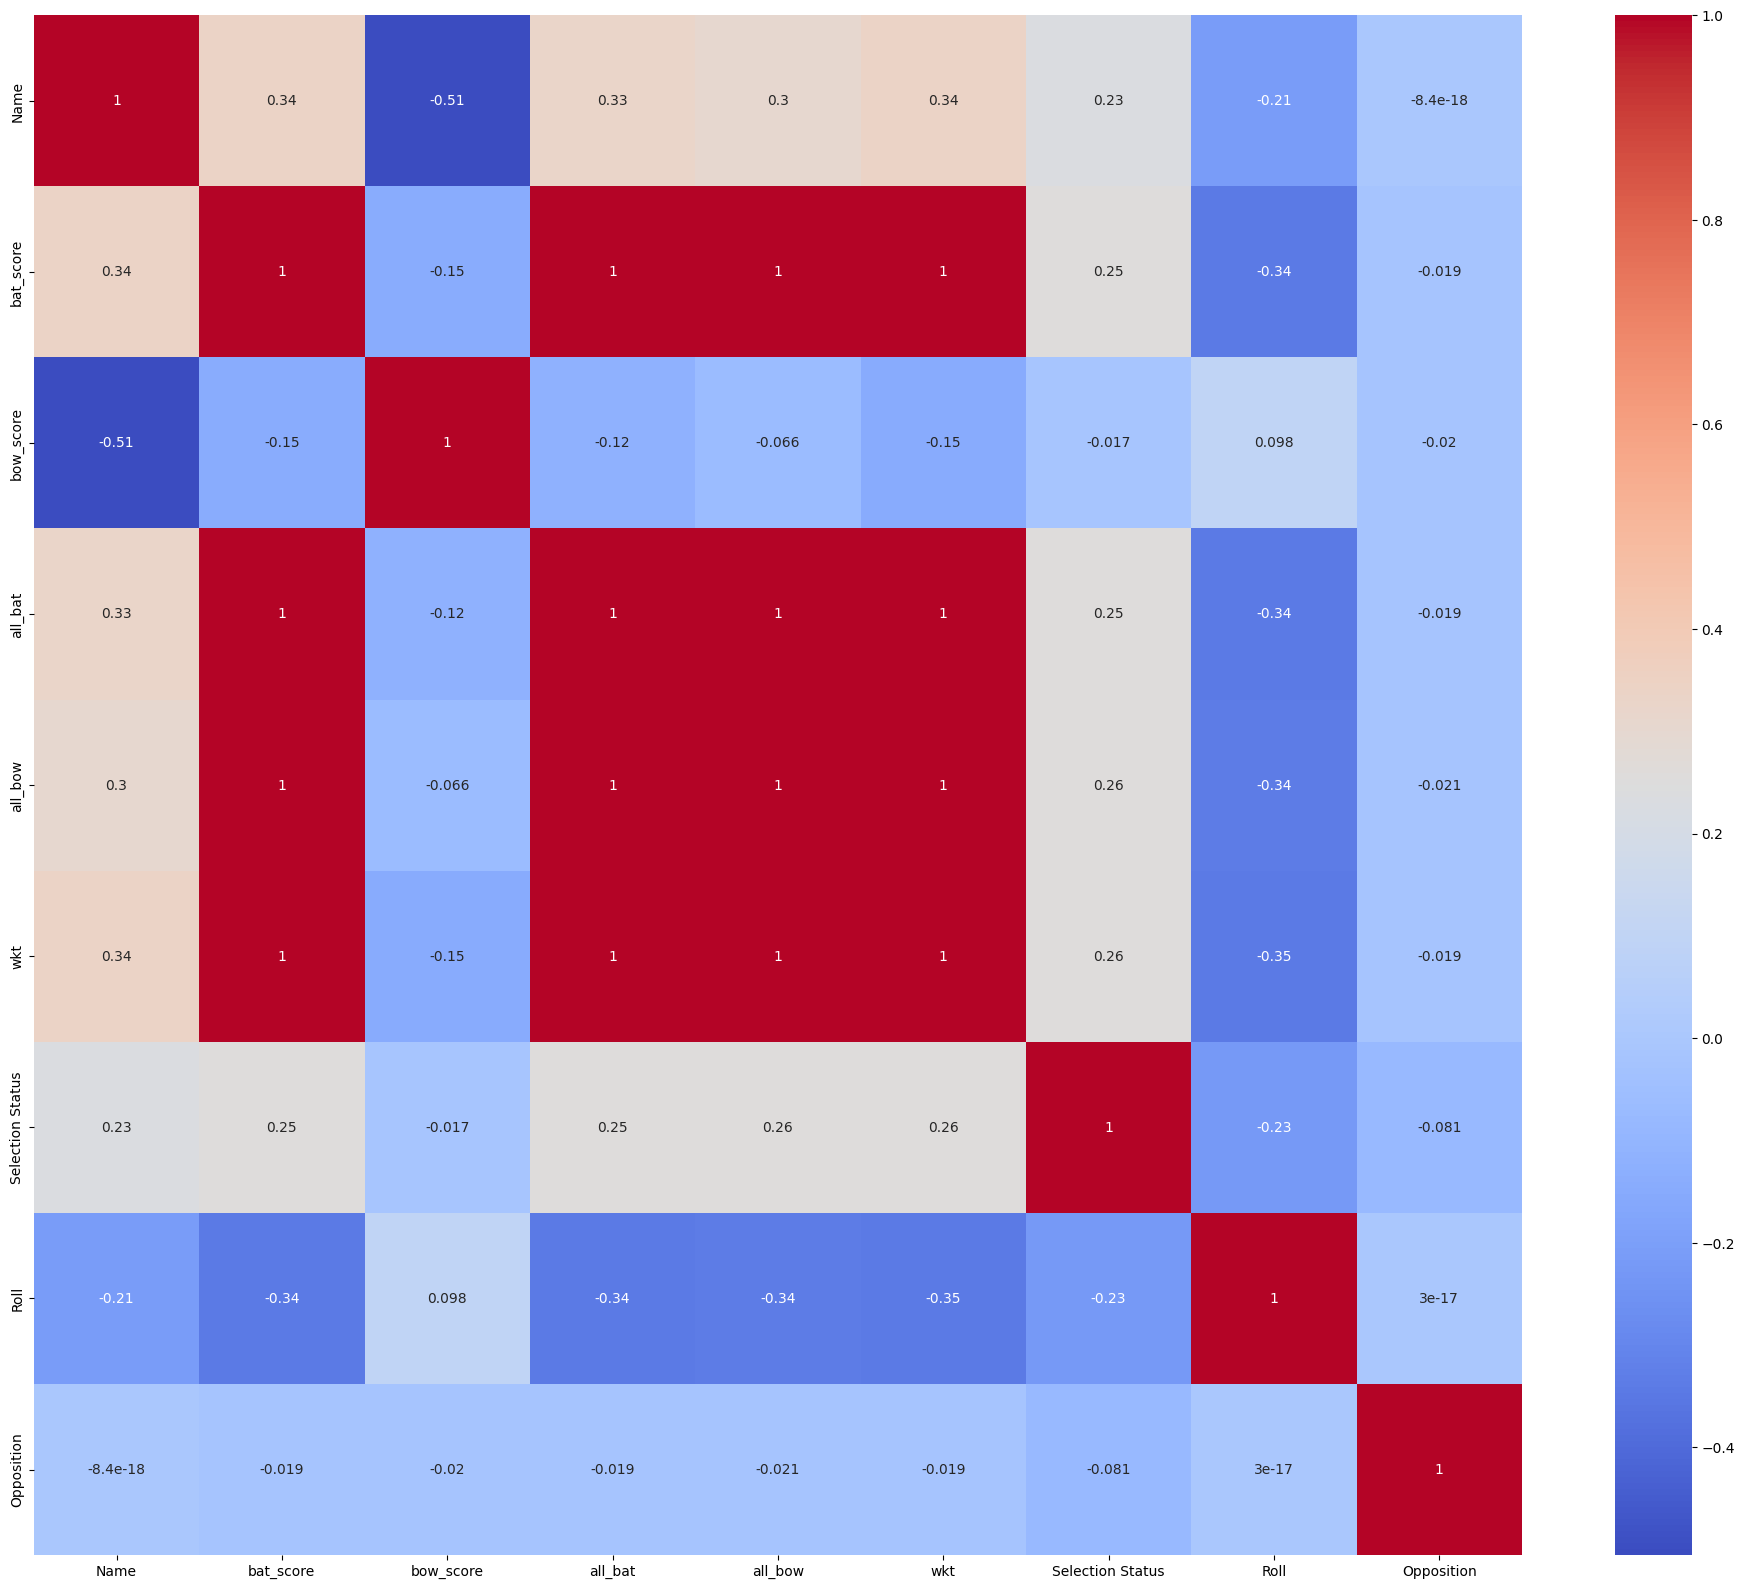

In [355]:
plt.figure(figsize=(24,20))
sns.heatmap(df4.corr(),annot=True,cmap='coolwarm')

In [356]:
new_df = df4.drop(['Selection Status'],axis=1)

In [357]:
new_df

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Roll,Opposition
0,16,1367.06,41.73,961.12,762.32,615.18,1,1
1,9,907.20,31.59,638.20,506.86,408.24,1,1
2,3,0.00,0.00,0.00,0.00,0.00,1,1
3,12,0.00,0.00,0.00,0.00,0.00,1,1
4,8,0.00,0.00,0.00,0.00,0.00,1,1
...,...,...,...,...,...,...,...,...
420,14,12.50,50.09,13.76,19.40,5.63,2,1
421,15,111.07,0.00,77.75,61.09,49.98,1,1
422,0,129.17,266.19,117.04,137.59,58.13,3,1
423,4,431.24,371.32,339.00,330.01,194.06,0,1


In [358]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(new_df, df4["Selection Status"], random_state=42, test_size=0.15)

In [359]:
standard_scaler = StandardScaler().fit(x_train)
x_train_scaled = standard_scaler.transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

In [360]:
x_train_scaled.shape, x_test_scaled.shape

((361, 8), (64, 8))

In [365]:
import tensorflow as tf
from tensorflow import keras
tf.get_logger().setLevel('ERROR')
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_decay_cb = keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=1, factor=0.5, min_lr=1e-8)

In [366]:
nn_model = keras.models.Sequential([
keras.layers.InputLayer(x_train_scaled.shape[1],),
keras.layers.Dense(256, activation="relu"),
keras.layers.Dense(32, activation="relu"),
keras.layers.Dense(1, activation="sigmoid")
])
nn_model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(), \
                 metrics=["accuracy", 'AUC', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.F1Score()])

In [367]:
history = nn_model.fit(x_train_scaled, np.asanyarray(y_train).astype(np.float32),
                       epochs=100, batch_size=28, validation_split=0.15, callbacks=[early_stopping_cb], verbose=0)

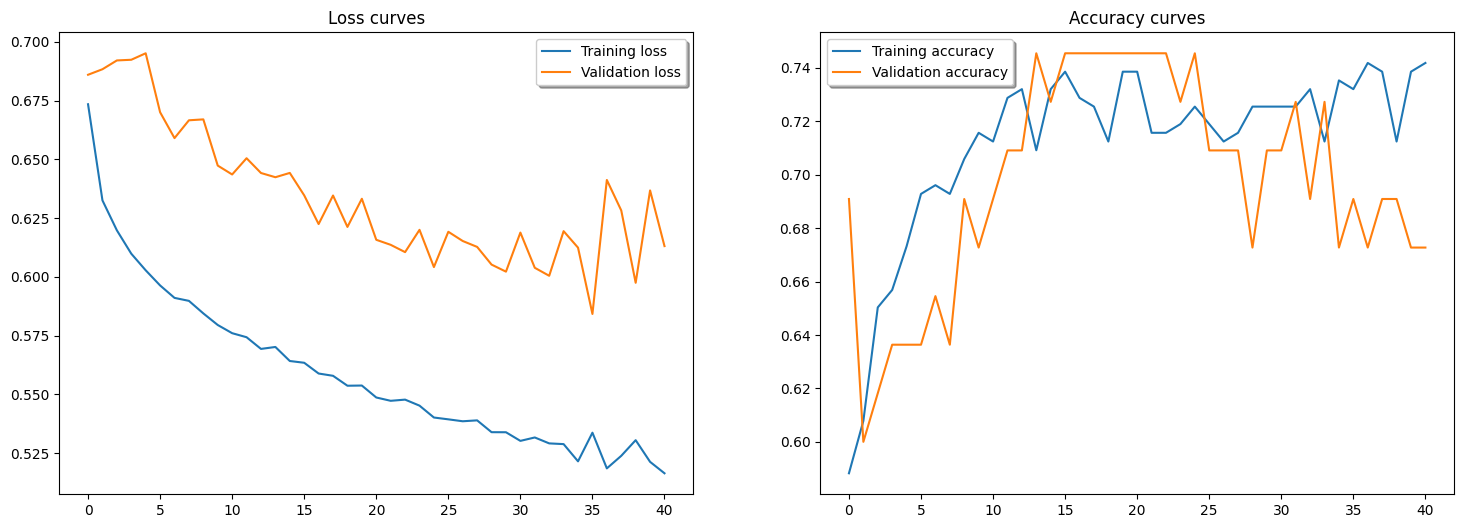

In [368]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].set_title('Loss curves')
ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[1].set_title('Accuracy curves')
ax[1].legend(loc='best', shadow=True)

plt.show()

In [369]:
!pip install scikeras

In [370]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_validate

In [371]:
base_model = KerasClassifier(model=nn_model, batch_size=32, epochs=100, verbose=0)

In [372]:
score_type = ['accuracy', 'precision', 'recall', 'f1']

In [373]:
score = cross_validate(base_model, x_train_scaled, y_train, cv=10, scoring = score_type, return_train_score=True, verbose=0)

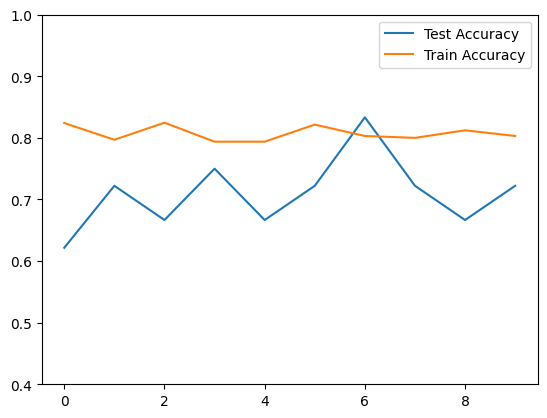

In [374]:
plt.plot(score['test_accuracy'])
plt.plot(score['train_accuracy'])

plt.legend(['Test Accuracy', 'Train Accuracy'], loc= "best")
plt.gca().set_ylim(0.4,1)
plt.show()

In [375]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(x_train_scaled.shape[1], ))

    for i in range(hp.Int('num_layers', 2, 6, default=3)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), 8, 128, step=16), activation='relu'))

    if hp.Boolean('dropout'):
        model.add(keras.layers.Dropout(rate=0.4))

    model.add(keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])), metrics=["accuracy", 'AUC', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.F1Score()])

    return model

In [376]:
!pip install keras_tuner

In [377]:
import keras_tuner as kt

In [378]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=5,
    overwrite=True
)

In [379]:
tuner.search(x_train_scaled, np.asarray(y_train).astype(np.float32),
             validation_split=0.15, epochs=60, batch_size=32,
             callbacks=[early_stopping_cb, checkpoint_cb, lr_decay_cb])

Trial 20 Complete [00h 00m 37s]
val_accuracy: 0.6836363554000855

Best val_accuracy So Far: 0.7054545521736145
Total elapsed time: 00h 19m 24s


In [380]:
best_nn_model = tuner.get_best_models()[0]

In [381]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               2304      
                                                                 
 dense_4 (Dense)             (None, 32)                8224      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10561 (41.25 KB)
Trainable params: 10561 (41.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [382]:
best_nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 104)               936       
                                                                 
 dense_2 (Dense)             (None, 72)                7560      
                                                                 
 dense_3 (Dense)             (None, 8)                 584       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9233 (36.07 KB)
Trainable params: 9233 (36

In [383]:
nn_loss = best_nn_model.evaluate(x_test_scaled, np.asarray(y_test).astype(np.float32))

2/2 [==============================] - 1s 40ms/step - loss: 0.6207 - accuracy: 0.6562 - auc: 0.7330 - precision: 0.6970 - recall: 0.6571 - f1_score: 0.7071
